<a href="https://colab.research.google.com/github/bieri2/ATMS597-Project3-GroupE/blob/master/ATMS597_Project3_Arka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt  
import glob
import xarray as xr

In [3]:
!pip install netcdf4
!pip install pydap

     |████████████████████████████████| 4.1MB 2.6MB/s 
     |████████████████████████████████| 317kB 26.3MB/s 
     |████████████████████████████████| 2.3MB 2.8MB/s 
     |████████████████████████████████| 122kB 52.5MB/s 


In [4]:
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 2.9MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    U

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/noaa_data_project3/data/global-precipitation-climatology-project-gpcp-daily/access"
files_2016 = glob.glob("/content/drive/My Drive/noaa_data_project3/data/global-precipitation-climatology-project-gpcp-daily/access/2016/*.nc")
files_2016 = np.unique(files_2016)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
 Aggregate_GCPC_daily_1996_2019.nc   MOD35_L2_soumi
 ATMS_597			     noaa_data_project3
'CAMP2Ex AHI Videos-selected.zip'    noaa_reanalysis_data
'Colab Notebooks'		     plots_ATMS597
'Getting started.pdf'
1996  1998  2000  2002	2004  2006  2008  2010	2012  2014  2016  2018
1997  1999  2001  2003	2005  2007  2009  2011	2013  2015  2017  2019


In [0]:
nc=xr.open_dataset(files_2016[0])
nc

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, nv: 2, time: 1)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2016-01-01 00:00:00
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (latitude, nv) float32 ...
    lon_bounds   (longitude, nv) float32 ...
    time_bounds  (time, nv) object ...
    precip       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/201601/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T17:17:05Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    id:                         201601/gpcp_v01r03_daily_d20160101_c20170530.nc
    naming_authority:           gov.noaa.ncdc
    date_created:               2017-05-30T17:17:05Z
    license:                    No constraints on data access or use.
    summary:                    Global Precipitation Climatology Project (GPC...
    keywords:                   EARTH SCIENCE > ATMOSPHERE > PRECIPITATION > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ea...
    cdm_data_type:              Grid
    project:                    GPCP > Global Precipitation Climatology Project
    processing_level:           NASA Level 3
    creator_name:               Dr. Jian-Jian Wang
    creator_email:              jjwang@umd.edu
    institution:                ACADEMIC > UMD/ESSIC > Earth System Science I...
    publisher_name:             NOAA National Centers for Environmental Infor...
    publisher_email:            jjwang@umd.edu
    publisher_url:              https://www.ncei.noaa.gov
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  1 degree
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  1 degree
    time_coverage_start:        2016-01-01T00:00:00Z
    time_coverage_end:          2016-01-01T23:59:59Z
    time_coverage_duration:     P1D
    contributor_name:           Robert Adler, Jian-Jian Wang
    contributor_role:           principalInvestigator, processor and custodian
    acknowledgment:             This project was supported in part by a grant...
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, AIRS > Atmospheric Infrared Sounder, ...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

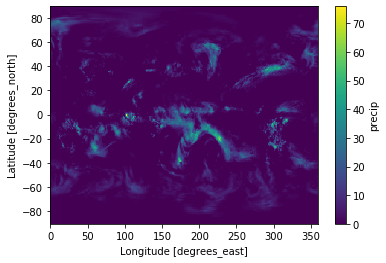

In [0]:
ncvar = nc['precip']
ncvar.mean(axis=0)
ncvar.mean(dim='time').plot()
plt.show()

In [0]:
years = np.arange(1996,2020)
gcpc_daily_data_directory = "/content/drive/My Drive/noaa_data_project3/data/global-precipitation-climatology-project-gpcp-daily/access/"

#Calculate total number of days in dataset
count = 0
times = []
for i in range(0,len(years)): 
  nc_files = sorted(glob.glob(gcpc_daily_data_directory + str(years[i]) + "/*.nc"))
  for n in range(0,len(nc_files)):
    filename = nc_files[n].replace(gcpc_daily_data_directory+str(years[i]),'')
    date = filename.split('_')[3].replace('d','')
    date = pd.to_datetime(date, format='%Y%m%d')
    times = np.append(times, date)

In [0]:
latitude = np.arange(-90.0,90.0)
longitude = np.arange(0.0,360.0)
data = np.zeros((len(times),len(latitude),len(longitude),1))
# precip_agg = xr.DataArray(data, coords=[times, latitude, longitude], dims=['time', 'latitude', 'longitude'])

count = 0
for i in range(0, len(years)): #len(years)
  print(i)
  nc_files = glob.glob(gcpc_daily_data_directory + str(years[i]) + "/*.nc")
  for n in range(0, len(nc_files)):
    try:
      nc = xr.open_dataset(nc_files[n])
      ncvar = nc['precip']
      precip = ncvar.mean(axis=0)
      data[count,:,:,0] = precip
    except:
      continue
    count = count + 1

# precip_agg = xr.DataArray(data, coords=[times, latitude, longitude], dims=['time', 'latitude', 'longitude'])

In [0]:
data1 = data.squeeze(axis=3)
precip_agg = xr.DataArray(data1, coords=[times, latitude, longitude], dims=['time', 'latitude', 'longitude'])
precip_agg.to_netcdf('/content/drive/My Drive/Aggregate_GCPC_daily_1996_2019.nc')

In [15]:
!ls "/content/drive/My Drive"
precip_agg = xr.open_dataset("/content/drive/My Drive/Aggregate_GCPC_daily_1996_2019.nc")

 Aggregate_GCPC_daily_1996_2019.nc   MOD35_L2_soumi
 ATMS_597			     noaa_data_project3
'CAMP2Ex AHI Videos-selected.zip'    noaa_reanalysis_data
'Colab Notebooks'		     plots_ATMS597
'Getting started.pdf'


In [16]:
precip_agg

<xarray.Dataset>
Dimensions:                        (latitude: 180, longitude: 360, time: 8507)
Coordinates:
  * time                           (time) datetime64[ns] 1996-10-01 ... 2019-11-30
  * latitude                       (latitude) float64 -90.0 -89.0 ... 88.0 89.0
  * longitude                      (longitude) float64 0.0 1.0 ... 358.0 359.0
Data variables:
    __xarray_dataarray_variable__  (time, latitude, longitude) float64 ...

In [88]:
def is_djf(month):
    return (month == 12) | (month <= 2)
    
pcp_j = precip_agg.sel(latitude=-6.21,longitude=106.85,method='nearest')
pcp_j = pcp_j.sel(time=is_djf(pcp_j['time.month']))
pcp_j = pcp_j.where(pcp_j != -99999.0)
pcp_j = pcp_j.where(pcp_j < 200.)
pcp_quant = pcp_j.quantile(0.95)
precip = pcp_j.to_array()
pcp_quant = pcp_quant.to_array().values
pcp_above_dates = pcp_j['time'][np.where(precip[0,:]>=pcp_quant[:])]
pcp_above_dates

<xarray.DataArray 'time' (time: 104)>
array(['1996-12-13T00:00:00.000000000', '1996-12-21T00:00:00.000000000',
       '1996-12-31T00:00:00.000000000', '1997-01-18T00:00:00.000000000',
       '1998-01-07T00:00:00.000000000', '1998-01-09T00:00:00.000000000',
       '1998-01-20T00:00:00.000000000', '1998-02-08T00:00:00.000000000',
       '1998-02-21T00:00:00.000000000', '1998-02-25T00:00:00.000000000',
       '1998-02-28T00:00:00.000000000', '1998-12-03T00:00:00.000000000',
       '1999-01-29T00:00:00.000000000', '1999-02-08T00:00:00.000000000',
       '1999-12-15T00:00:00.000000000', '1999-12-31T00:00:00.000000000',
       '2000-02-29T00:00:00.000000000', '2000-12-14T00:00:00.000000000',
       '2000-12-28T00:00:00.000000000', '2000-12-29T00:00:00.000000000',
       '2001-01-15T00:00:00.000000000', '2001-02-17T00:00:00.000000000',
       '2001-02-21T00:00:00.000000000', '2001-12-23T00:00:00.000000000',
       '2001-12-29T00:00:00.000000000', '2002-01-11T00:00:00.000000000',
       '2002-01-23T00:00:00.000000000', '2002-01-25T00:00:00.000000000',
       '2002-01-30T00:00:00.000000000', '2002-02-20T00:00:00.000000000',
       '2002-12-21T00:00:00.000000000', '2002-12-29T00:00:00.000000000',
       '2002-12-30T00:00:00.000000000', '2004-01-11T00:00:00.000000000',
       '2004-01-13T00:00:00.000000000', '2004-01-27T00:00:00.000000000',
       '2004-02-06T00:00:00.000000000', '2004-02-11T00:00:00.000000000',
       '2004-02-20T00:00:00.000000000', '2004-02-25T00:00:00.000000000',
       '2004-12-21T00:00:00.000000000', '2004-12-30T00:00:00.000000000',
       '2005-01-24T00:00:00.000000000', '2005-02-05T00:00:00.000000000',
       '2005-02-15T00:00:00.000000000', '2005-12-03T00:00:00.000000000',
       '2005-12-05T00:00:00.000000000', '2005-12-18T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-01-05T00:00:00.000000000',
       '2006-01-06T00:00:00.000000000', '2006-01-10T00:00:00.000000000',
       '2006-01-21T00:00:00.000000000', '2006-01-28T00:00:00.000000000',
       '2007-12-09T00:00:00.000000000', '2007-12-12T00:00:00.000000000',
       '2007-12-13T00:00:00.000000000', '2008-01-04T00:00:00.000000000',
       '2008-01-08T00:00:00.000000000', '2008-02-12T00:00:00.000000000',
       '2008-12-08T00:00:00.000000000', '2009-01-07T00:00:00.000000000',
       '2009-01-18T00:00:00.000000000', '2009-01-19T00:00:00.000000000',
       '2009-01-25T00:00:00.000000000', '2009-02-05T00:00:00.000000000',
       '2009-02-26T00:00:00.000000000', '2009-12-04T00:00:00.000000000',
       '2010-02-03T00:00:00.000000000', '2010-02-14T00:00:00.000000000',
       '2010-02-16T00:00:00.000000000', '2010-02-23T00:00:00.000000000',
       '2010-12-27T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-01-09T00:00:00.000000000', '2011-01-24T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2013-02-06T00:00:00.000000000',
       '2013-02-11T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2013-12-02T00:00:00.000000000', '2013-12-07T00:00:00.000000000',
       '2013-12-10T00:00:00.000000000', '2013-12-11T00:00:00.000000000',
       '2014-02-15T00:00:00.000000000', '2014-02-17T00:00:00.000000000',
       '2014-12-10T00:00:00.000000000', '2014-12-26T00:00:00.000000000',
       '2015-01-14T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2016-01-17T00:00:00.000000000', '2016-02-03T00:00:00.000000000',
       '2016-02-19T00:00:00.000000000', '2016-02-26T00:00:00.000000000',
       '2016-12-03T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-17T00:00:00.000000000', '2017-01-27T00:00:00.000000000',
       '2017-02-09T00:00:00.000000000', '2018-01-07T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-02-28T00:00:00.000000000',
       '2019-01-04T00:00:00.000000000', '2019-01-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 1996-12-13 1996-12-21 ... 2019-01-28
    latitude   float64 -6.0
    longitude  float

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


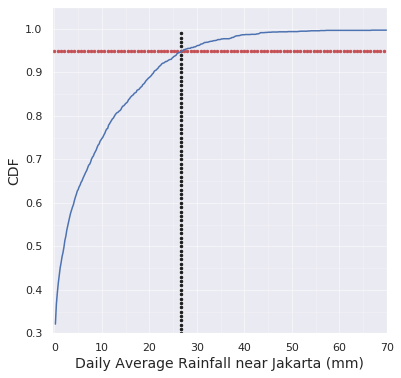

In [92]:
nbins = 1000
counts, edges = np.histogram(precip[0,:], bins=nbins, range=(0,200), density = False)

# cdf
cdf = np.cumsum(counts)/len(precip[0,:])

#To find the 95%-ile rainfall
rain_95 = pcp_quant #approximately
x = np.zeros(100)
y = np.zeros(100)
x[:] = rain_95
y[:] = 0.95

plt.figure(figsize=(6,6))
ax = plt.gca()
plt.plot(edges[1:], cdf)
plt.scatter(x,np.arange(0,1.,0.01),color='k',s=6.)
plt.scatter(np.arange(0,70.,70/100),y,color='r',s=6.)
plt.plot(y,y,'k')
plt.ylabel('CDF', fontsize=14)
plt.xlabel('Daily Average Rainfall near Jakarta (mm)', fontsize=14)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 101, 10)
minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks/100.)
ax.set_yticks(minor_ticks/100., minor=True)

plt.grid()

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.xlim(-.50,70.)
plt.ylim(0.3,1.05)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


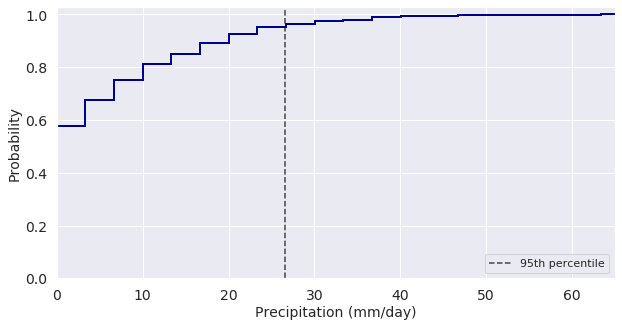

In [90]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(precip[0,:], 20, linewidth=2.0, color='darkblue', density=True, histtype='step', cumulative=True)
plt.vlines(pcp_quant,0,1.1, linestyles='dashed', label='95th percentile', alpha=0.8)
plt.legend(loc='lower right')
ax.set_xlim(0,65)
ax.set_ylim(0,1.03)
ax.set_xlabel('Precipitation (mm/day)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

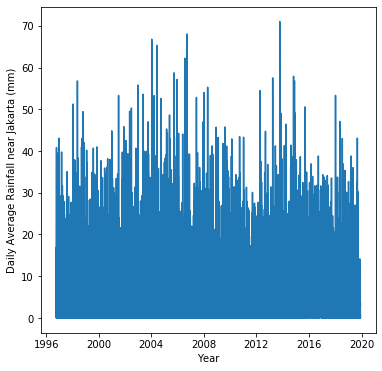

In [0]:
nc_jakarta = precip_agg.sel(latitude = -6., longitude = 107., method='nearest')
jakarta = nc_jakarta.to_array()

jakarta[np.where(jakarta>200.)] = np.nan
jakarta[np.where(jakarta<0.)] = np.nan

plt.figure(figsize=(6,6))
plt.plot(nc_jakarta.time,jakarta[0,:])
plt.xlabel('Year')
plt.ylabel('Daily Average Rainfall near Jakarta (mm)')
plt.show()

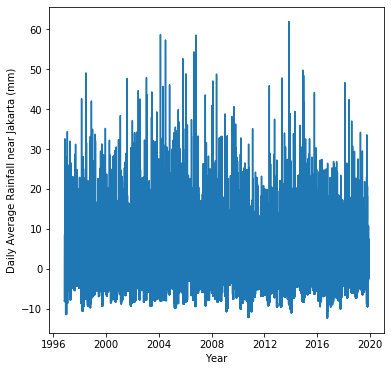

In [0]:
_, index = np.unique(nc_jakarta['time'], return_index=True) #Remove duplicate timestamps if any
nc_jakarta = nc_jakarta.isel(time=index)
jakarta = nc_jakarta.to_array()

jakarta[np.where(jakarta>200.)] = np.nan
jakarta[np.where(jakarta<0.)] = np.nan

monthly = jakarta.resample(time='1MS').mean()
upsampled_monthly = monthly.resample(time='1D').ffill()
anomalies = jakarta - upsampled_monthly

plt.figure(figsize=(6,6))
plt.plot(nc_jakarta.time[29:],anomalies[0,:])
plt.xlabel('Year')
plt.ylabel('Daily Average Rainfall near Jakarta (mm)')
plt.show()

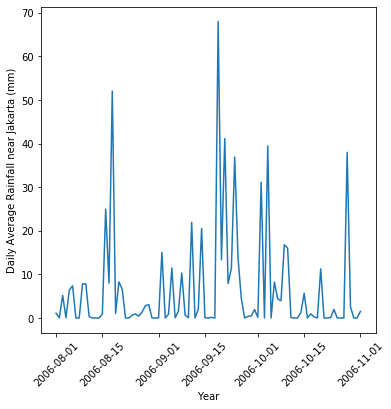

In [0]:
#3 months - August - November 2006
jakarta_months = nc_jakarta.loc[dict(time=slice('2006-08-01', '2006-11-01'))]
months_data = np.squeeze(jakarta_months.to_array())

plt.figure(figsize=(6,6))
ax = plt.gca()
plt.plot(jakarta_months.time,months_data)
plt.xlabel('Year')
plt.ylabel('Daily Average Rainfall near Jakarta (mm)')
ax.tick_params(axis='x', rotation=45)
plt.show()

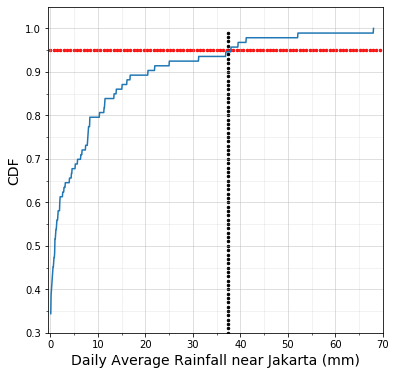

In [0]:
nbins = 1000
counts, edges = np.histogram(months_data, bins=nbins, density = False)

# cdf
cdf = np.cumsum(counts)/len(months_data)

#To find the 95%-ile rainfall
rain_95 = np.mean(edges[np.where(abs(cdf-0.95)==np.min(abs(cdf-0.95)))]) #approximately
x = np.zeros(100)
y = np.zeros(100)
x[:] = rain_95
y[:] = 0.95

plt.figure(figsize=(6,6))
ax = plt.gca()
plt.plot(edges[1:], cdf)
plt.scatter(x,np.arange(0,1.,0.01),color='k',s=6.)
plt.scatter(np.arange(0,70.,70/100),y,color='r',s=6.)
plt.plot(y,y,'k')
plt.ylabel('CDF', fontsize=14)
plt.xlabel('Daily Average Rainfall near Jakarta (mm)', fontsize=14)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 101, 10)
minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks/100.)
ax.set_yticks(minor_ticks/100., minor=True)

plt.grid()

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.xlim(-.50,70.)
plt.ylim(0.3,1.05)
plt.show()

In [0]:
jakarta_months, rain_95

(<xarray.Dataset>
 Dimensions:                        (time: 93)
 Coordinates:
   * time                           (time) datetime64[ns] 2006-08-01 ... 2006-11-01
     latitude                       float64 -6.0
     longitude                      float64 107.0
 Data variables:
     __xarray_dataarray_variable__  (time) float64 1.096 0.03066 ... 0.0 1.514,
 37.382417251586915)

In [0]:
highrain_data = months_data[months_data >= rain_95]

highrain_data

<xarray.DataArray (time: 5)>
array([52.06176758, 68.02987671, 41.17220688, 39.4630127 , 37.99600601])
Coordinates:
  * time       (time) datetime64[ns] 2006-08-18 2006-09-19 ... 2006-10-28
    latitude   float64 -6.0
    longitude  float64 107.0
    variable   <U29 '__xarray_dataarray_variable__'

**Analysis of Reanalysis Data**

In [0]:
pressure_levels = ['surface', '850', '500', '250']
quant_surface = ['temperature', 'winds']
quant_850 = ['temperature', 'SH', 'winds']
quant_500 = ['winds', 'hgt']
quant_250 = ['wind_vecs', 'winds']
temp_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/air.day.1981-2010.ltm.nc"
hgt_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/hgt.day.1981-2010.ltm.nc"
uwnd_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/uwnd.day.1981-2010.ltm.nc"
vwnd_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/vwnd.day.1981-2010.ltm.nc"
RH_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/rhum.day.1981-2010.ltm.nc"
SH_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/shum.day.1981-2010.ltm.nc"


for i in range(1,2): #len(pressure_levels)
     quant = quant_850
     for j in range(1,2): #len(quant)
        print(quant[j])
        if (quant[j] == 'SH'):
          nc = xr.open_dataset(SH_reanalysis)

SH


/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [0]:
print(nc)
print(nc['time'])

<xarray.Dataset>
Dimensions:             (lat: 73, level: 8, lon: 144, nbnds: 2, time: 365)
Coordinates:
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * level               (level) float32 1000.0 925.0 850.0 ... 500.0 400.0 300.0
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 1981-01-01 ... 2010-12-31
    shum                (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    COARDS
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/06/27 by doDayL

In [0]:
SH = nc.sel(level=850.0)
# nc_fid = netCDF4.Dataset(SH_reanalysis, 'r')
time = nc['time']
time.values

**Global long-term mean composites for the selected months**

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


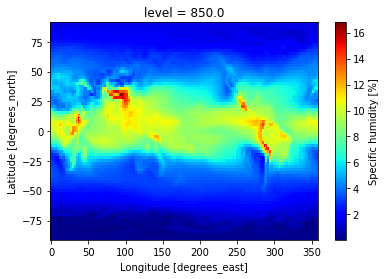

In [0]:
variables = 'shum'
Long_names = 'Specific humidity'
Units = '%'
shum_nc = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/'+variable+'.mon.ltm.nc',engine='netcdf4')
data_850 = shum_nc.sel(level=850.0)
months = data_850['time'][7:11]
data_850_months = data_850.sel(time=months)
im = data_850_months[variable].mean(dim='time').plot(cmap='jet', add_colorbar=False)
cb = plt.colorbar(im)
cb.set_label(Long_names+' ['+Units+']')
plt.show()

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


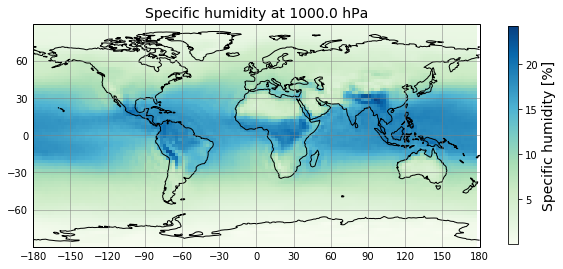

In [0]:
levels = [1000.,850.,500.,250.]
variables = ['shum', 'rhum', 'air', 'hgt']
Long_names = ['Specific humidity', 'Relative Humidity', 'Temperature', 'Geopotential Heights']
Units = ['%', '%', 'deg C', 'm']
cmap = ['GnBu','GnBu','jet','jet']

for ivariables in range(0, 1): #len(variables)
  nc = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/'+
                       str(variables[ivariables])+'.mon.ltm.nc',engine='netcdf4')
  time_months = nc['time'][7:11]
  lats = nc['lat'][:]
  lons = nc['lon'][:]
  lons_cyclic = np.roll(lons, 72)
  for ilevel in range(0, 1): #len(levels)
    data_level = nc.sel(level=levels[ilevel])
    data_level_months = data_level.sel(time=time_months)
    plot_data = np.roll(data_level_months[variables[ivariables]].mean('time'),72,axis=1)
    plt.figure(figsize=(10,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    plt.pcolormesh(lons_cyclic, lats, plot_data,
                transform=ccrs.PlateCarree(), cmap=cmap[ivariables])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')
    #set where the gridlines go
    gl.xlocator = mticker.FixedLocator(np.arange(-180,181,30))
    gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
    gl.xlabels_top = False
    gl.ylabels_right = False
    plt.title(Long_names[ivariables]+' at '+str(levels[ilevel])+' hPa', fontsize=14)
    ax.coastlines()
    cb = plt.colorbar(shrink=0.8)
    cb.set_label(str(Long_names[ivariables])+' ['+Units[ivariables]+']', fontsize=14)
    plt.show()

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

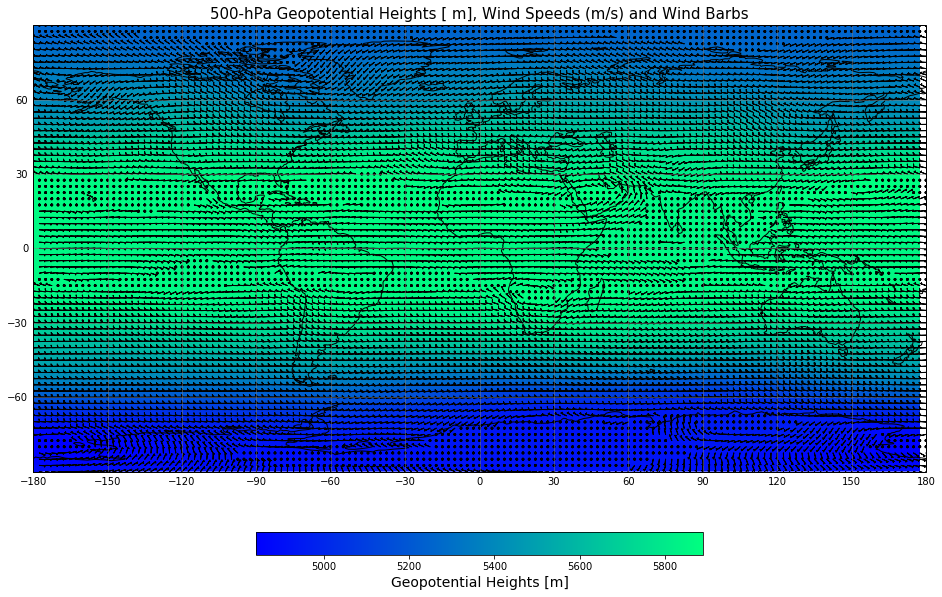

In [0]:
levels = [1000.,850.,500.,250.]
variables = ['air', 'shum', 'hgt', 'hgt']
Long_names = ['Temperature', 'Specific Humidity', 'Geopotential Heights', 
              'Geopotential Heights']
Units = ['$^{\circ}$ C', '%', 'm', 'm']
cmap = ['jet','GnBu','winter','winter']

nc_u = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.ltm.nc',engine='netcdf4')
nc_v = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.ltm.nc',engine='netcdf4')
nc_sp = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/wspd.mon.ltm.nc',engine='netcdf4')

for ivariables in range(2, 3): #len(variables)
  nc = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/'+
                       str(variables[ivariables])+'.mon.ltm.nc',engine='netcdf4')
  time_months = nc['time'][7:11]
  lats = nc['lat'][:]
  lons = nc['lon'][:]
  lons_cyclic = np.roll(lons, 72)
  ilevel = ivariables
  data_level = nc.sel(level=levels[ilevel])
  data_level_months = data_level.sel(time=time_months)
  plot_data = np.roll(data_level_months[variables[ivariables]].mean('time'),72,axis=1)
  uwnd_level = nc_u.sel(level=levels[ilevel])
  uwnd_level_months = uwnd_level.sel(time=time_months)
  uwnd_data = np.roll(uwnd_level_months['uwnd'].mean('time'),72,axis=1)
  vwnd_level = nc_v.sel(level=levels[ilevel])
  vwnd_level_months = vwnd_level.sel(time=time_months)
  vwnd_data = np.roll(vwnd_level_months['vwnd'].mean('time'),72,axis=1)
  plt.figure(figsize=(16,16))
  ax = plt.axes(projection=ccrs.PlateCarree())
  plt.pcolormesh(lons_cyclic, lats, plot_data,
              transform=ccrs.PlateCarree(), cmap=cmap[ivariables])
  ax.barbs(lons_cyclic, lats, uwnd_data, vwnd_data, length=3.5)
  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='-')
  #set where the gridlines go
  gl.xlocator = mticker.FixedLocator(np.arange(-180,181,30))
  gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
  gl.xlabels_top = False
  gl.ylabels_right = False
  plt.title(str(int(levels[ilevel]))+'-hPa '+Long_names[ivariables]+' ['
                ' '+Units[ivariables]+'], Wind Speeds (m/s) '+
                'and Wind Barbs', fontsize=15)
  ax.coastlines()
  cb = plt.colorbar(orientation='horizontal', shrink=0.5, pad=0.07)
  cb.set_label(str(Long_names[ivariables])+' ['+Units[ivariables]+']', fontsize=14)
  plt.show()

In [0]:
l = np.resize(lons_cyclic, 36)
l.shape

(36,)